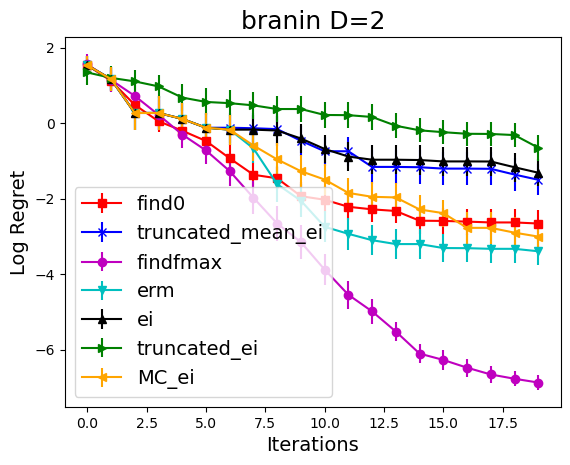

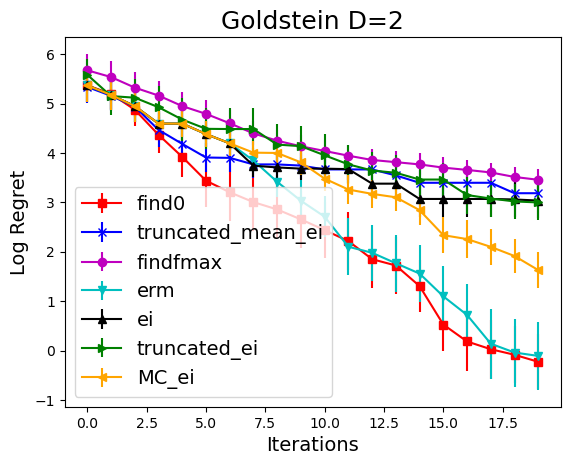

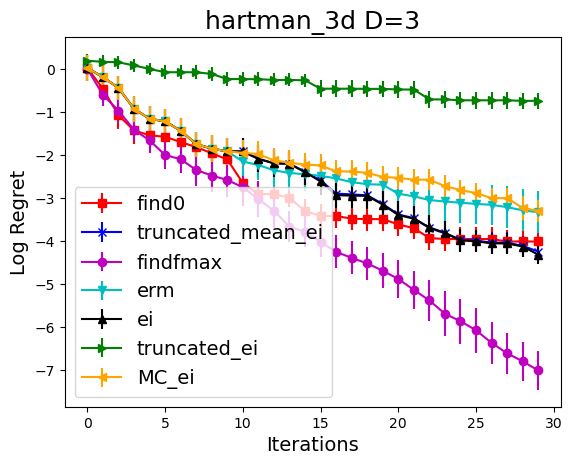

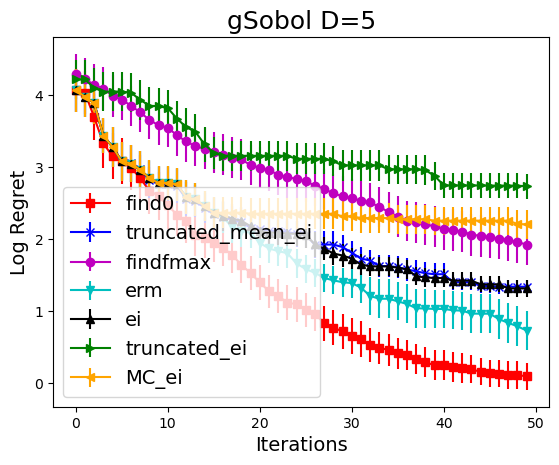

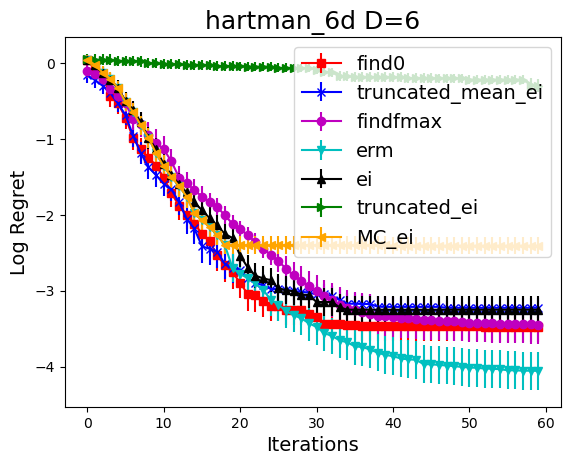

<Figure size 640x480 with 0 Axes>

In [4]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from bayes_opt import BayesOpt,BayesOpt_KnownOptimumValue,NormalBayesOpt_Known


import numpy as np
#from bayes_opt import auxiliary_functions
from bayes_opt import functions
from bayes_opt import utilities
import warnings
#from bayes_opt import acquisition_maximization

import sys

import itertools

import os
import matplotlib.pyplot as plt


np.random.seed(6789)

warnings.filterwarnings("ignore")


myfunction_list=[]


# myfunction_list.append(functions.forrester())
myfunction_list.append(functions.branin())
myfunction_list.append(functions.goldstein())
#myfunction_list.append(functions.sixhumpcamel())
myfunction_list.append(functions.hartman_3d())
#myfunction_list.append(functions.ackley(input_dim=5))
#myfunction_list.append(functions.alpine1(input_dim=5))
myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1])))
myfunction_list.append(functions.hartman_6d())
#myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1])))


acq_type_list=[]

temp={}
temp['name']='find0' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)


temp={}
temp['name']='truncated_mean_ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

temp={}
temp['name']='findfmax' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)


temp={}
temp['name']='erm' # expected regret minimization
temp['IsTGP']=0 # recommended to use tgp for ERM
acq_type_list.append(temp)




temp={}
temp['name']='ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)



temp={}
temp['name']='truncated_ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

temp={}
temp['name']='MC_ei' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)

fig=plt.figure()

color_list=['r','b','m','c','k','g','orange']
marker_list=['s','x','o','v','^','>','<']


for idx, (myfunction,acq_type,) in enumerate(itertools.product(myfunction_list,acq_type_list)):
    
    method_number = len(acq_type_list)
    nRepeat = 20
    y_best_sofar = np.genfromtxt(os.path.join(os.getcwd(),'N=20/'+str(acq_type['name'])+'+'+str(myfunction.name)+'.csv'), delimiter=',')
    myxaxis=range(y_best_sofar.shape[1])
    
 
    plt.errorbar(myxaxis,np.mean(np.log(y_best_sofar),axis=0),np.std(np.log(y_best_sofar),axis=0)/np.sqrt(nRepeat),label=acq_type['name'],color=color_list[idx%method_number],marker=marker_list[idx%method_number])
    
    if (idx+1)%method_number == 0:
        plt.ylabel("Log Regret",fontsize=14)
        plt.xlabel("Iterations",fontsize=14)
        plt.legend(prop={'size': 14})
        strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
        plt.title(strTitle,fontsize=18)
        plt.show()
        plt.savefig(str(myfunction.name)+'.png')

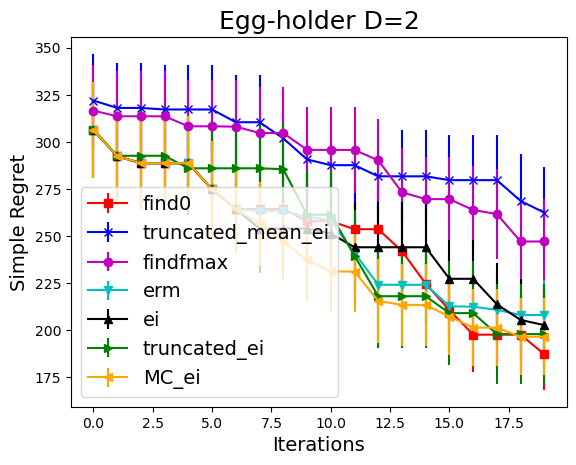

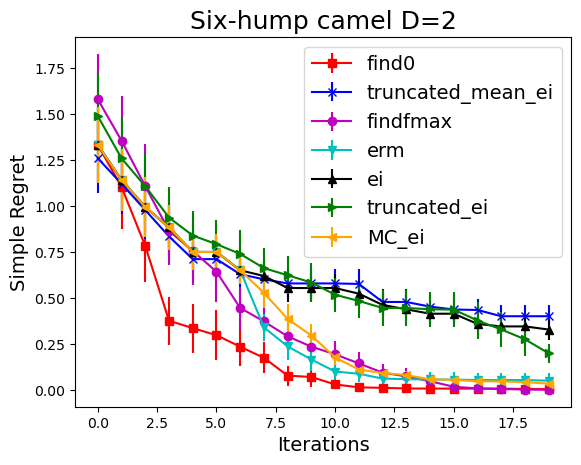

In [5]:
myfunction_list=[]


myfunction_list.append(functions.forrester())
# myfunction_list.append(functions.branin())
# myfunction_list.append(functions.goldstein())
# myfunction_list.append(functions.eggholder())
# myfunction_list.append(functions.sixhumpcamel())
# myfunction_list.append(functions.hartman_3d())
#myfunction_list.append(functions.ackley(input_dim=5))
#myfunction_list.append(functions.alpine1(input_dim=5))
# myfunction_list.append(functions.hartman_6d())
# myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1])))
#myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1])))


acq_type_list=[]

temp={}
temp['name']='find0' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)


temp={}
temp['name']='truncated_mean_ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

temp={}
temp['name']='findfmax' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)


temp={}
temp['name']='erm' # expected regret minimization
temp['IsTGP']=0 # recommended to use tgp for ERM
acq_type_list.append(temp)




temp={}
temp['name']='ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)



temp={}
temp['name']='truncated_ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

temp={}
temp['name']='MC_ei' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)

fig=plt.figure()

color_list=['r','b','m','c','k','g','orange']
marker_list=['s','x','o','v','^','>','<']


for idx, (myfunction,acq_type,) in enumerate(itertools.product(myfunction_list,acq_type_list)):
    
    method_number = len(acq_type_list)
    nRepeat = 20
    y_best_sofar = np.genfromtxt(os.path.join(os.getcwd(),'N=20/'+str(acq_type['name'])+'+'+str(myfunction.name)+'.csv'), delimiter=',')
    myxaxis=range(y_best_sofar.shape[1])
    
 
    plt.errorbar(myxaxis,np.mean((y_best_sofar),axis=0),np.std((y_best_sofar),axis=0)/np.sqrt(nRepeat),label=acq_type['name'],color=color_list[idx%method_number],marker=marker_list[idx%method_number])
    
    if (idx+1)%method_number == 0:
        plt.ylabel("Simple Regret",fontsize=14)
        plt.xlabel("Iterations",fontsize=14)
        plt.legend(prop={'size': 14})
        strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
        plt.title(strTitle,fontsize=18)
        plt.show()

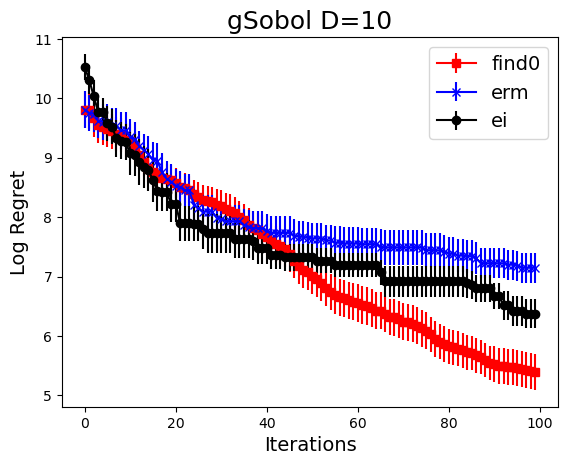

<Figure size 640x480 with 0 Axes>

In [5]:

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from bayes_opt import BayesOpt,BayesOpt_KnownOptimumValue,NormalBayesOpt_Known


import numpy as np
#from bayes_opt import auxiliary_functions
from bayes_opt import functions
from bayes_opt import utilities
import warnings
#from bayes_opt import acquisition_maximization

import sys

import itertools

import os
import matplotlib.pyplot as plt


np.random.seed(6789)

warnings.filterwarnings("ignore")


myfunction_list=[]



myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1])))


acq_type_list=[]

temp={}
temp['name']='find0' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)




temp={}
temp['name']='erm' # expected regret minimization
temp['IsTGP']=0 # recommended to use tgp for ERM
acq_type_list.append(temp)




temp={}
temp['name']='ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)


fig=plt.figure()

color_list=['r','b','k','c','m','g','orange']
marker_list=['s','x','o','v','^','>','<']


for idx, (myfunction,acq_type,) in enumerate(itertools.product(myfunction_list,acq_type_list)):
    
    method_number = len(acq_type_list)
    nRepeat = 20
    y_best_sofar = np.genfromtxt(os.path.join(os.getcwd(),'N=20/10d/'+str(acq_type['name'])+'+'+str(myfunction.name)+'.csv'), delimiter=',')
    myxaxis=range(y_best_sofar.shape[1])
    
 
    plt.errorbar(myxaxis,np.mean(np.log(y_best_sofar),axis=0),np.std(np.log(y_best_sofar),axis=0)/np.sqrt(nRepeat),label=acq_type['name'],color=color_list[idx%method_number],marker=marker_list[idx%method_number])
    
    if (idx+1)%method_number == 0:
        plt.ylabel("Log Regret",fontsize=14)
        plt.xlabel("Iterations",fontsize=14)
        plt.legend(prop={'size': 14})
        strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
        plt.title(strTitle,fontsize=18)
        plt.show()
        plt.savefig(str(myfunction.name)+'.png')